First order differential equations


Reference model
\begin{cases} y' = f(x,y) \\ y(0)= y_0\end{cases}

Example
Differential equation:

\begin{cases} y' = -{y^2\over x^2} \\ y(1)= {1\over 2}\end{cases}



​Analytical solution in Python (SymPy):



**Initialization and symbolic variables**

In [ ]:
# Symbolic library and its initialization
import sympy as sy

sy.init_printing() #If all you want is the best pretty printing, use the init_printing() function. This will automatically enable the best printer available in your

# For function plot
from sympy.plotting import plot

# Some common variables
x = sy.symbols('x')

y = sy.Function('y')
y1 = sy.Derivative(y(x), x)

#print(y1)

**General solution**

In [ ]:
# General solution

# Definition
eqdiff = y1 + (y(x)**2)/x**2

# Solution
sol = sy.solve(eqdiff, y(x)) #dsolve returns an instance of Eq . This is because in general, solutions to differential equations cannot be solved explicitly for the function.

# Print
sy.pprint(sol)

⎡       ___________        ___________⎤
⎢      ╱  d               ╱  d        ⎥
⎢-x⋅  ╱  -──(y(x)) , x⋅  ╱  -──(y(x)) ⎥
⎣   ╲╱    dx           ╲╱    dx       ⎦


**Task 1**
Solve the differential equation 
$y
′
=
2
t
(
25
−
y
)$
.

**Solution with the initial condition**

In [ ]:
# Solution with the given initial conditions
sol = sy.dsolve(eqdiff, y(x),ics={y(1): '1/2'}) #initial conditions
sy.pprint(sol)


         -x   
y(x) = ───────
       1 - 3⋅x


**Task 2:** Solve the initial value problem:
$d
y/
d
x
=
2
x
,
y
(
0
)
=
2$
.

**Plot and svg**

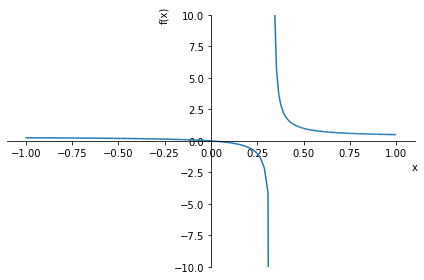

In [ ]:
# Plotting


#title = sy.latex(sol.rhs)
xtol = 1e-3
p1 = plot(sol.rhs, (x,-1,1/3-xtol), show=False, ylim=[-10,10],) #sol.rhs will return a SymPy Float object.
p2 = plot(sol.rhs, (x,1/3+xtol,1), show=False, ylim=[-10,10])
p1.extend(p2)
p1.show()

# Save in svg format
#p1.save("ode-1.svg")

**Plot using matplotlib**

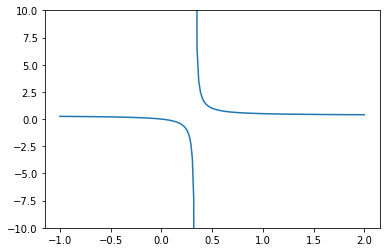

In [ ]:
# plot using matplotlib
f = sy.lambdify(x, sol.rhs, 'numpy')

import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-1, 1/3-xtol, num=100) #You can use numpy.linspace() to create the values of the x axis
x2 = np.linspace(1/3+xtol, 2, num=100)

plt.plot(x1, f(x1), '-', c='C0')
plt.plot(x2, f(x2), '-', c='C0')
plt.ylim(-10,10)
plt.savefig("ode-1-mpl.svg")
plt.show()

**Numerical solution in Python (SciPy)**

Initialization and equation in the standard solver format

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Model
def model(y, t):
    dydt = -y**2/t**2
    return dydt

**Numerical solution in a given interval**

In [ ]:
# Solution
t = np.linspace(1, 10, 100)
y0 = 1/2
sol = odeint(model, y0, t)

print(t,sol)

[ 1.          1.09090909  1.18181818  1.27272727  1.36363636  1.45454545
  1.54545455  1.63636364  1.72727273  1.81818182  1.90909091  2.
  2.09090909  2.18181818  2.27272727  2.36363636  2.45454545  2.54545455
  2.63636364  2.72727273  2.81818182  2.90909091  3.          3.09090909
  3.18181818  3.27272727  3.36363636  3.45454545  3.54545455  3.63636364
  3.72727273  3.81818182  3.90909091  4.          4.09090909  4.18181818
  4.27272727  4.36363636  4.45454545  4.54545455  4.63636364  4.72727273
  4.81818182  4.90909091  5.          5.09090909  5.18181818  5.27272727
  5.36363636  5.45454545  5.54545455  5.63636364  5.72727273  5.81818182
  5.90909091  6.          6.09090909  6.18181818  6.27272727  6.36363636
  6.45454545  6.54545455  6.63636364  6.72727273  6.81818182  6.90909091
  7.          7.09090909  7.18181818  7.27272727  7.36363636  7.45454545
  7.54545455  7.63636364  7.72727273  7.81818182  7.90909091  8.
  8.09090909  8.18181818  8.27272727  8.36363636  8.45454545  8.545

**Plot and svg export**

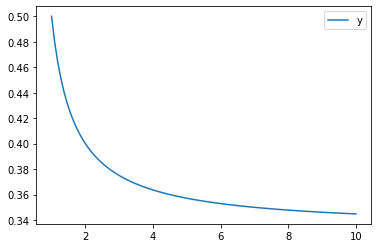

In [ ]:
# plot
#plt.figure(figsize=(11,9))
plt.plot(t,sol, label="y")
plt.legend()

# Save in svg format
plt.savefig("ode_num-1.svg")
plt.show()

***ASSIGNMENT***

**QUESTION1:**
Solve the differential equation 
$y
′
=
2
t
(
25
−
y
)$
.

**QUESTION2:** Solve the initial value problem:
$d
y/
d
x
=
2
x
,
y
(
0
)
=
2$
.

**QUESTION3:**
Consider the equation of a freely falling object
$dv/
dt
= g – bv^2$
1. Solve the differential equation where Take $b = 1$ and $g = 10$
2. Plot $v$ vs $t$
3. Plot $b$ vs $t$ in different values of $b$, i.e $b = 1,$ $b = 2,$ $b = 3$, $b = -4$, and $b = -2$.